In [2]:
!pip install fastai

Defaulting to user installation because normal site-packages is not writeable


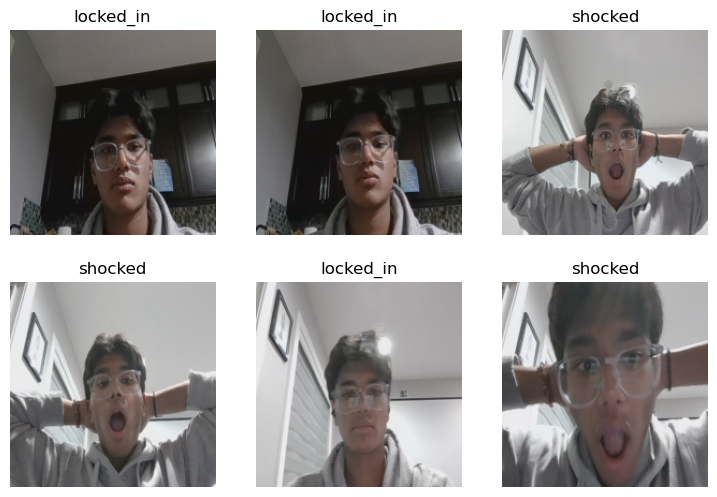

In [1]:
from fastai.vision.all import *

path = 'images'
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [2]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.529905,0.045601,0.009074,01:54


epoch,train_loss,valid_loss,error_rate,time
0,0.058623,0.122336,0.032668,02:30
1,0.033680,0.003951,0.001815,02:21
2,0.020879,0.011714,0.005445,02:25


In [3]:
learn.export("brainrot_emotion_finder_1.pkl")